# **NIH Chest X Ray Multi-Label Multi-Class Classification**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **Background:**

Chest X-ray imaging is a common diagnostic tool for detecting various thoracic diseases and abnormalities. The National Institutes of Health (NIH) Chest X-ray dataset contains a large collection of labeled X-ray images, each associated with multiple findings and diseases. Leveraging deep learning techniques on this dataset can significantly aid in automated disease detection and classification, reducing the burden on radiologists and improving diagnostic accuracy.

## **Problem Description:**
The objective of this project is to develop a deep learning model capable of accurately detecting and classifying thoracic diseases and abnormalities from NIH Chest X-ray images. The model should be able to handle multi-label classification, as each image may contain multiple disease findings. Key challenges include handling class imbalance, interpreting ambiguous findings, and ensuring robust generalization to unseen data.

## **About Dataset**

**Source:** https://www.kaggle.com/datasets/nih-chest-xrays/data
### **NIH Chest X-ray Dataset**
National Institutes of Health Chest X-Ray Dataset
Chest X-ray exams are one of the most frequent and cost-effective medical imaging examinations available. However, clinical diagnosis of a chest X-ray can be challenging and sometimes more difficult than diagnosis via chest CT imaging. The lack of large publicly available datasets with annotations means it is still very difficult, if not impossible, to achieve clinically relevant computer-aided detection and diagnosis (CAD) in real world medical sites with chest X-rays. One major hurdle in creating large X-ray image datasets is the lack resources for labeling so many images. Prior to the release of this dataset, Openi was the largest publicly available source of chest X-ray images with 4,143 images available.

This NIH Chest X-ray Dataset is comprised of 112,120 X-ray images with disease labels from 30,805 unique patients. To create these labels, the authors used Natural Language Processing to text-mine disease classifications from the associated radiological reports. The labels are expected to be >90% accurate and suitable for weakly-supervised learning. The original radiology reports are not publicly available but you can find more details on the labeling process in this Open Access paper: "ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases." (Wang et al.)


### **Data limitations:**
The image labels are NLP extracted so there could be some erroneous labels but the NLP labeling accuracy is estimated to be >90%.
Very limited numbers of disease region bounding boxes (See BBox_list_2017.csv)
Chest x-ray radiology reports are not anticipated to be publicly shared. Parties who use this public dataset are encouraged to share their “updated” image labels and/or new bounding boxes in their own studied later, maybe through manual annotation

### **File contents**
Image format: 112,120 total images with size 1024 x 1024

* images_001.zip: Contains 4999 images

* images_002.zip: Contains 10,000 images

* images_003.zip: Contains 10,000 images

* images_004.zip: Contains 10,000 images

* images_005.zip: Contains 10,000 images

* images_006.zip: Contains 10,000 images

* images_007.zip: Contains 10,000 images

* images_008.zip: Contains 10,000 images

* images_009.zip: Contains 10,000 images

* images_010.zip: Contains 10,000 images

* images_011.zip: Contains 10,000 images

* images_012.zip: Contains 7,121 images

* README_ChestXray.pdf: Original README file

* BBox_list_2017.csv: Bounding box coordinates.
> Note: Start at x,y, extend horizontally w pixels, and vertically h pixels

* Image Index: File name
Finding Label: Disease type (Class label)
Bbox x
Bbox y
Bbox w
Bbox h
Data_entry_2017.csv: Class labels and patient data for the entire dataset

* Image Index: File name
Finding Labels: Disease type (Class label)
Follow-up #
Patient ID
Patient Age
Patient Gender
View Position: X-ray orientation
OriginalImageWidth
OriginalImageHeight
OriginalImagePixelSpacing_x
OriginalImagePixelSpacing_y

### **Class descriptions**
There are 15 classes (14 diseases, and one for "No findings"). Images can be classified as "No findings" or one or more disease classes:

* Atelectasis
* Consolidation
* Infiltration
* Pneumothorax
* Edema
* Emphysema
* Fibrosis
* Effusion
* Pneumonia
* Pleural_thickening
* Cardiomegaly
* Nodule Mass
* Hernia

Full Dataset Content
There are 12 zip files in total and range from ~2 gb to 4 gb in size. Additionally, we randomly sampled 5% of these images and created a smaller dataset for use in Kernels. The random sample contains 5606 X-ray images and class labels.

Sample: sample.zip

## **Goals and Deliverables:**

* Preprocess the NIH Chest X-ray dataset, including data cleaning, augmentation, and normalization.

* Design and train a deep learning model (such as a convolutional neural network) for multi-label classification of thoracic diseases.

* Implement evaluation metrics such as precision, recall, F1-score, and area under the receiver operating characteristic curve (AUC-ROC) to assess model performance.

* Validate the model on a separate test set and fine-tune hyperparameters to optimize performance.

* Generate insights into the model's predictions, including visualizations of attention maps or feature importance.

* Document the entire workflow, including code implementation, model architecture, training process, evaluation results, and interpretation of findings.

* Demonstrate the model's utility in real-world scenarios by showcasing its ability to assist radiologists in disease detection and classification tasks.

### **Expected Impact:**
By developing an accurate and reliable deep learning model for thoracic disease detection and classification, this project aims to enhance medical diagnostic capabilities, improve patient outcomes through early disease detection, and streamline radiology workflows.

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import os
import glob
import cv2
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

2024-04-16 05:05:33.514743: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 05:05:33.514848: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 05:05:33.777742: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# Check the input dir
os.listdir("../input/data")

['images_003',
 'images_012',
 'LOG_CHESTXRAY.pdf',
 'README_CHESTXRAY.pdf',
 'BBox_List_2017.csv',
 'images_009',
 'images_008',
 'images_007',
 'test_list.txt',
 'images_010',
 'ARXIV_V5_CHESTXRAY.pdf',
 'images_002',
 'images_011',
 'Data_Entry_2017.csv',
 'images_001',
 'train_val_list.txt',
 'images_005',
 'FAQ_CHESTXRAY.pdf',
 'images_004',
 'images_006']

In [ ]:
# Load the data entry csv file
df = pd.read_csv("../input/data/Data_Entry_2017.csv")
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [ ]:
# Check the number of images
glob_list = glob.glob("../input/data/images_*/images/*.png")
len(glob_list)

112120

In [ ]:
# Create full path for the images
image_paths = {os.path.basename(x): x for x in glob_list}
df['full_path'] = df['Image Index'].map(image_paths.get)
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,full_path
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,../input/data/images_001/images/00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,../input/data/images_001/images/00000001_001.png
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,../input/data/images_001/images/00000001_002.png
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,../input/data/images_001/images/00000002_000.png
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,../input/data/images_001/images/00000003_000.png


## **EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Image Index     112120 non-null  object
 1   Finding Labels  112120 non-null  object
 2   Follow-up #     112120 non-null  int64 
 3   Patient ID      112120 non-null  int64 
 4   Patient Age     112120 non-null  int64 
 5   Patient Gender  112120 non-null  object
 6   full_path       112120 non-null  object
dtypes: int64(3), object(4)
memory usage: 6.0+ MB


In [ ]:
df.describe()

,Follow-up #,Patient ID,Patient Age
count,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,46.901463
std,15.406320,8403.876972,16.839923
min,0.000000,1.000000,1.000000
25%,0.000000,7310.750000,35.000000
50%,3.000000,13993.000000,49.000000
75%,10.000000,20673.000000,59.000000
max,183.000000,30805.000000,414.000000


We dont need few of the columns namely "View Position, OriginalImage[Width, Height], OriginalImagePixelSpacing[x	y], Unnamed: 11"

So its better if we remove those columns

In [ ]:
df = df.drop(columns=['View Position', 'OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'])
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,full_path
0,00000001_000.png,Cardiomegaly,0,1,58,M,../input/data/images_001/images/00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,../input/data/images_001/images/00000001_001.png
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,../input/data/images_001/images/00000001_002.png
3,00000002_000.png,No Finding,0,2,81,M,../input/data/images_001/images/00000002_000.png
4,00000003_000.png,Hernia,0,3,81,F,../input/data/images_001/images/00000003_000.png


In [ ]:
# Number of unique combination of labels
print("Number of unique combination of labels:",len(df['Finding Labels'].value_counts()))

Number of unique combination of labels: 836


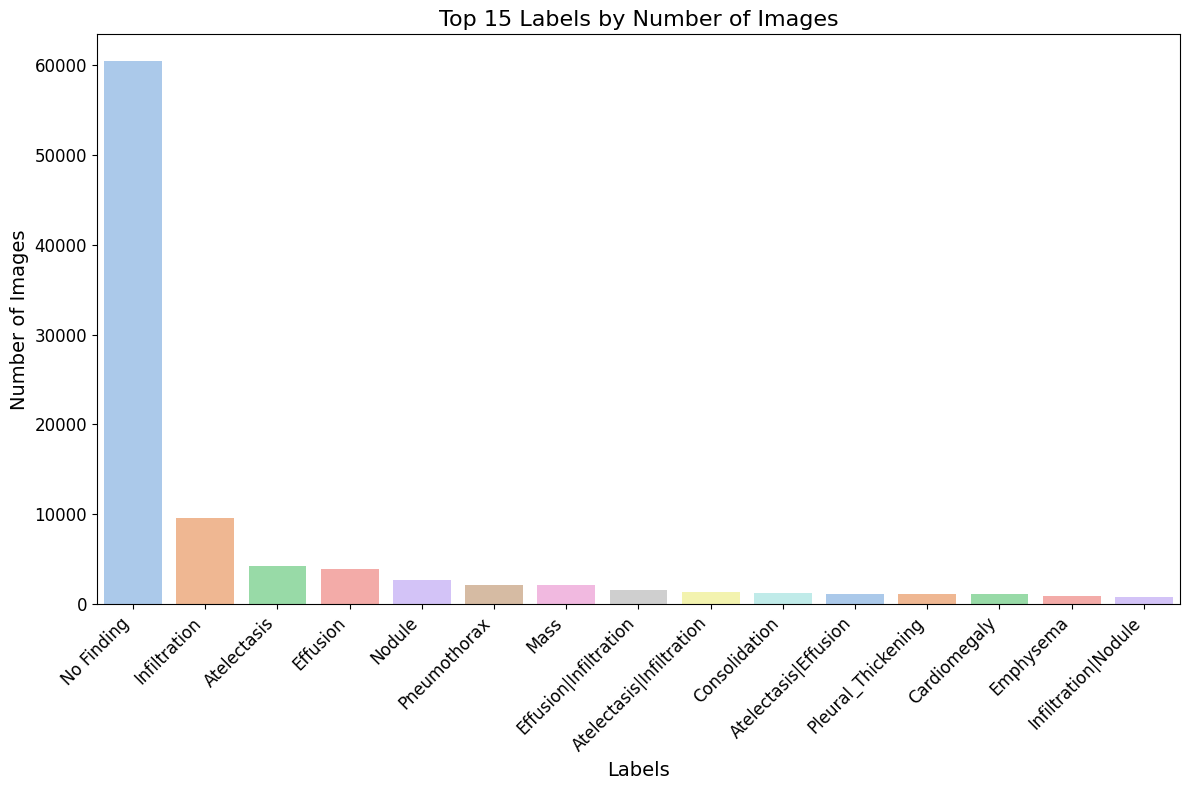

In [ ]:
# Plot for labels with high number of images
top_15_labels = df['Finding Labels'].value_counts()[:15]
colors = sns.color_palette('pastel')[:len(top_15_labels)]

plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_labels.index, y=top_15_labels, palette=colors)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Top 15 Labels by Number of Images', fontsize=16)
plt.tight_layout()
plt.show()

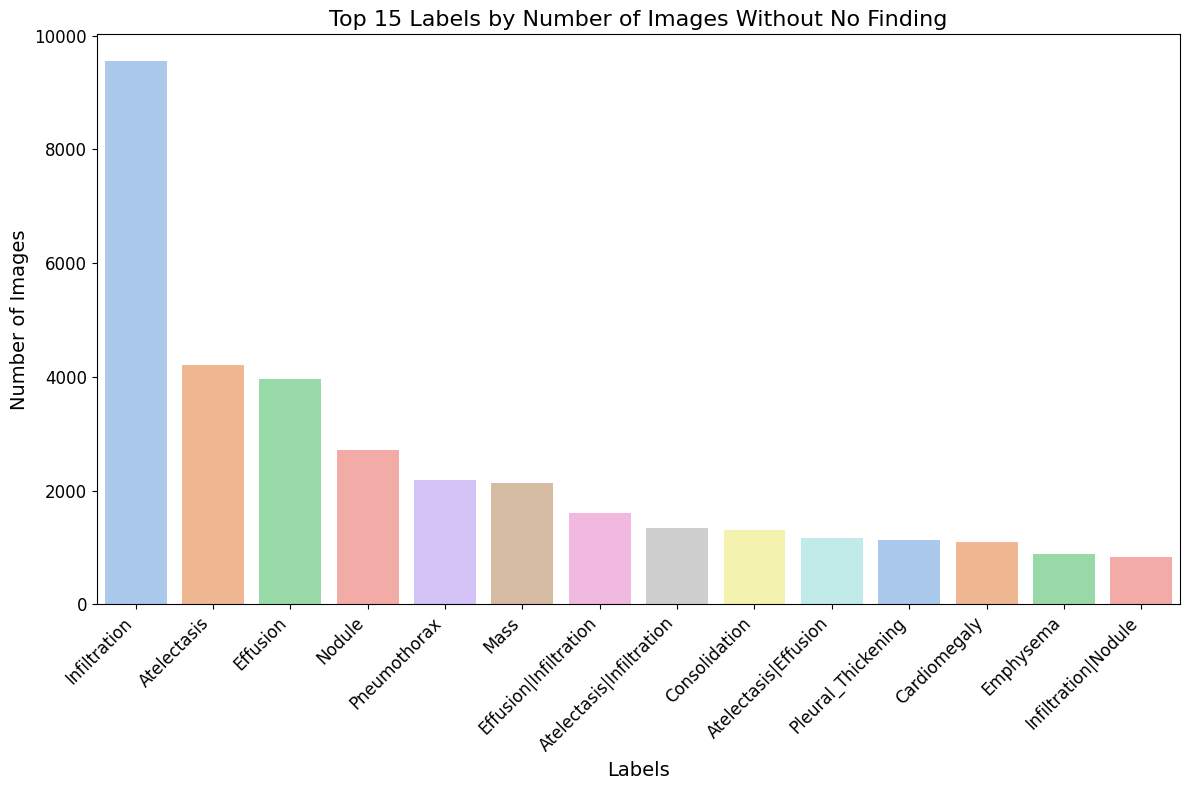

In [ ]:
# Plot for labels with high number of images without No Findings label
top_15_labels = df['Finding Labels'].value_counts()[1:15]
colors = sns.color_palette('pastel')[:len(top_15_labels)]

plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_labels.index, y=top_15_labels, palette=colors)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Top 15 Labels by Number of Images Without No Finding', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Check the highest age
df[df['Patient Age'] > 100]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,full_path
20852,00005567_000.png,Effusion|Pneumonia,0,5567,412,M,../input/data/images_003/images/00005567_000.png
46965,00011973_002.png,Edema,2,11973,414,M,../input/data/images_006/images/00011973_002.png
48284,00012238_010.png,No Finding,10,12238,148,M,../input/data/images_006/images/00012238_010.png
55742,00013950_000.png,No Finding,0,13950,148,M,../input/data/images_007/images/00013950_000.png
58650,00014520_026.png,Infiltration|Mass,26,14520,150,M,../input/data/images_007/images/00014520_026.png
62929,00015558_000.png,No Finding,0,15558,149,M,../input/data/images_007/images/00015558_000.png
74884,00018366_044.png,Pneumothorax,44,18366,152,F,../input/data/images_008/images/00018366_044.png
78795,00019346_000.png,Infiltration,0,19346,151,F,../input/data/images_009/images/00019346_000.png
84810,00020900_002.png,No Finding,2,20900,411,M,../input/data/images_009/images/00020900_002.png
85404,00021047_002.png,Mass|Pleural_Thickening,2,21047,412,M,../input/data/images_010/images/00021047_002.png


In [ ]:
df[df['Patient Age'] <= 0]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,full_path


There are some unsualy high age number so its better to remove those entries

In [ ]:
# Remove patient with age more than 100
df = df[df['Patient Age'] <= 100]
df.shape

(112104, 7)

In [ ]:
# Create dummy vairables for the 14 disease
disease_columns = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema',
                   'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening',
                   'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']

for disease in disease_columns:
    df[disease] = df["Finding Labels"].apply(lambda x: 1.0 if disease in x else 0)
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,full_path,Atelectasis,Consolidation,Infiltration,...,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,00000001_000.png,Cardiomegaly,0,1,58,M,../input/data/images_001/images/00000001_000.png,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,../input/data/images_001/images/00000001_001.png,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,../input/data/images_001/images/00000001_002.png,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,0,2,81,M,../input/data/images_001/images/00000002_000.png,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,../input/data/images_001/images/00000003_000.png,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.shape

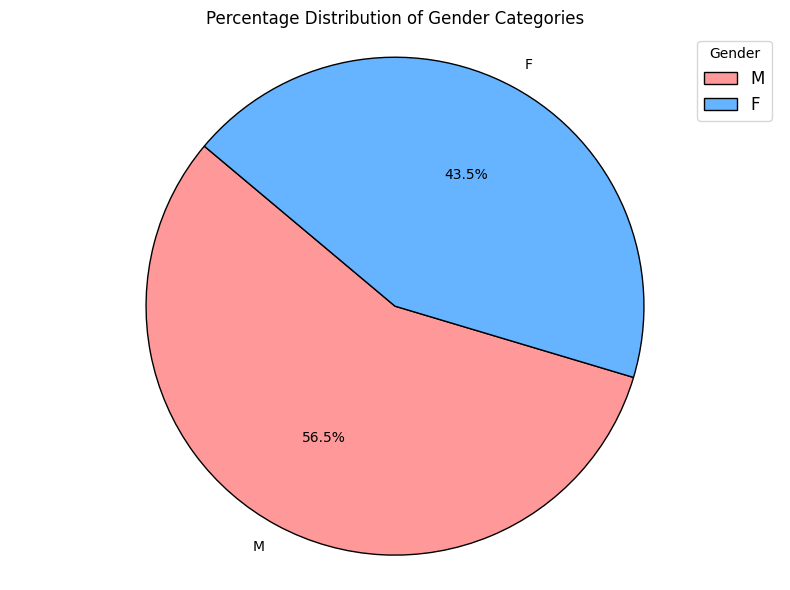

In [ ]:
# Pie chart for Percentage distribution of Gender

gender_count = df['Patient Gender'].value_counts()
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(8, 6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Percentage Distribution of Gender Categories')
plt.axis('equal')
plt.legend(title='Gender', loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

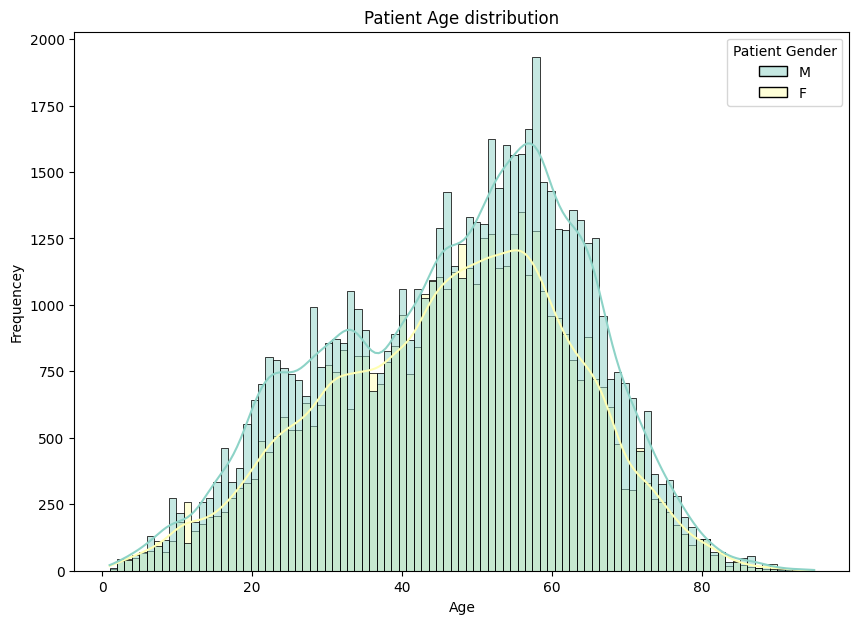

In [ ]:
# Paitent Age distribution

plt.figure(figsize=(10, 7))
sns.histplot(data=df, x="Patient Age", hue="Patient Gender", kde=True, palette='Set3')
plt.title("Patient Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequencey")
plt.show()

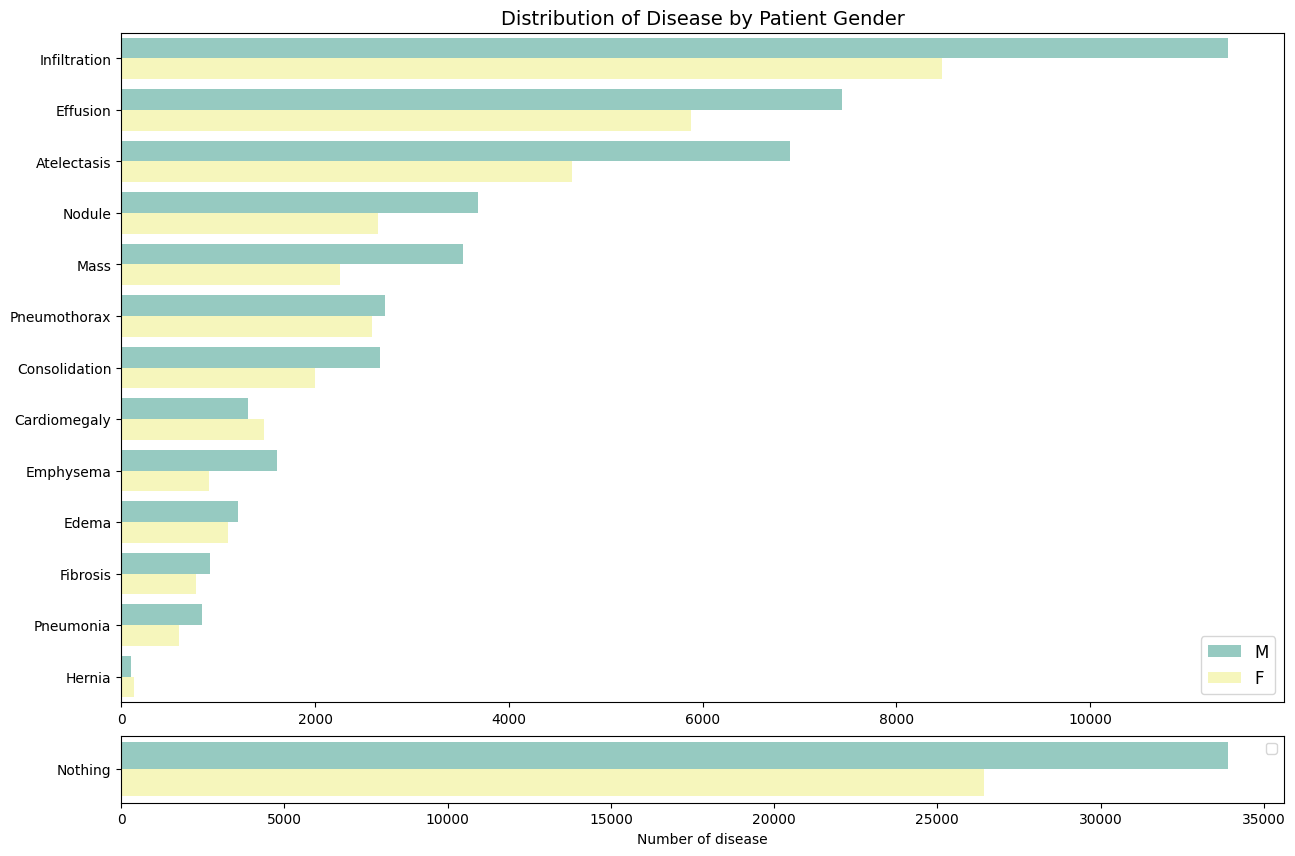

In [ ]:
## code source: https://github.com/anshuak100/NIH-Chest-X-ray-Dataset/blob/master/nih%20preprocessing.ipynb

plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:7, :])
ax2 = plt.subplot(gs[7, :])
data1 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(disease_columns),
             var_name = 'Category',
             value_name = 'Count')
data1 = data1.loc[data1.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data1, ax=ax1, order = data1['Category'].value_counts().index, palette='Set3')
ax1.set( ylabel="",xlabel="")
ax1.legend(fontsize=12)
ax1.set_title('Distribution of Disease by Patient Gender',fontsize=14);

df['Nothing']=df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

data2 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(['Nothing']),
             var_name = 'Category',
             value_name = 'Count')
data2 = data2.loc[data2.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data2,ax=ax2, palette='Set3')
ax2.set( ylabel="",xlabel="Number of disease")
ax2.legend('')
plt.subplots_adjust(hspace=.5)

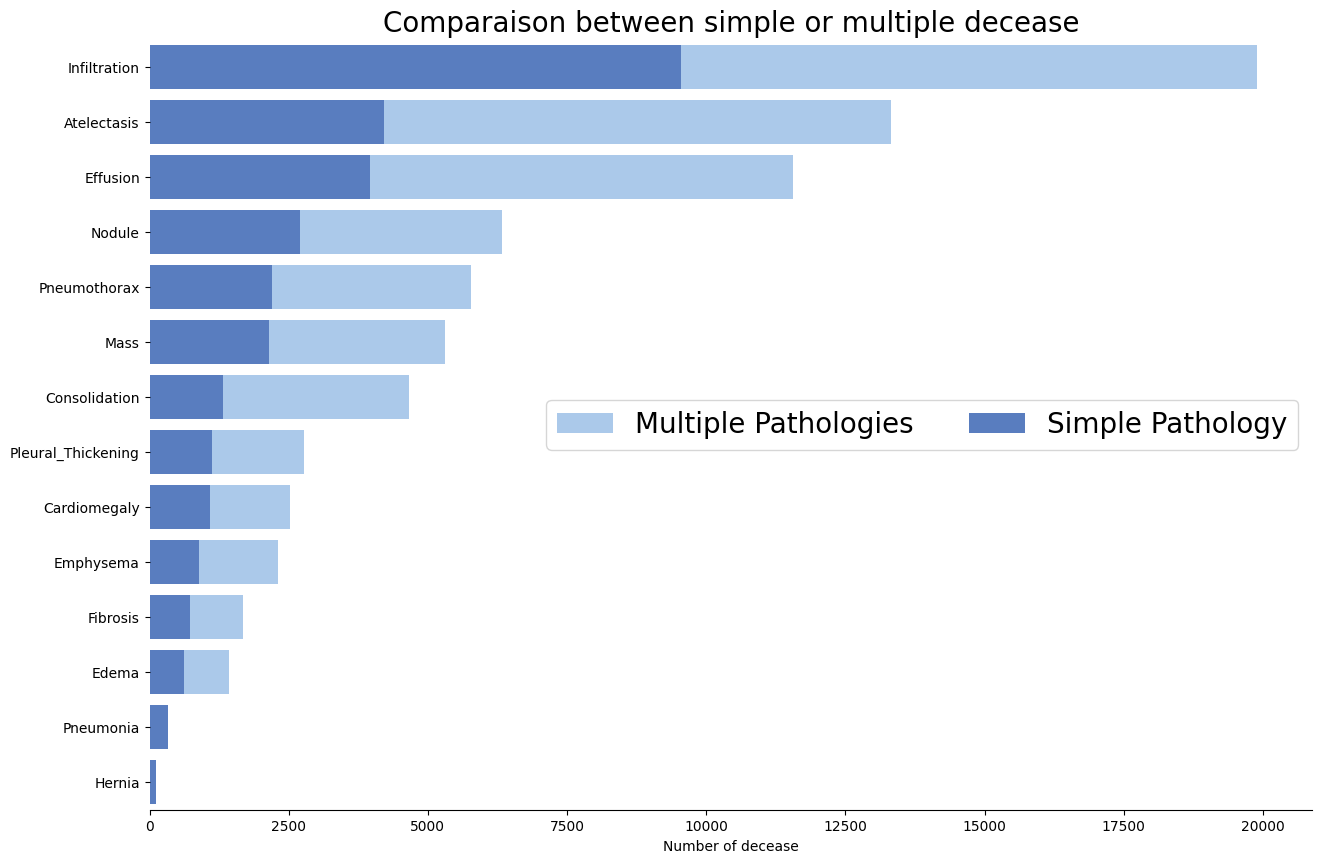

In [ ]:
## code source: https://github.com/anshuak100/NIH-Chest-X-ray-Dataset/blob/master/nih%20preprocessing.ipynb

df_grp=df.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False)
df1=df_grp[['|' in index for index in df_grp.index]].copy()
df2=df_grp[['|' not in index for index in df_grp.index]]
df2=df2[['No Finding' not in index for index in df2.index]]
df2['Finding Labels']=df2.index.values
df1['Finding Labels']=df1.index.values

f, ax = plt.subplots(sharex=True,figsize=(15, 10))
sns.set_color_codes("pastel")
g=sns.countplot(y='Category',data=data1, ax=ax, order = data1['Category'].value_counts().index,color='b',label="Multiple Pathologies")
sns.set_color_codes("muted")
g=sns.barplot(x='Patient ID',y='Finding Labels',data=df2, ax=ax, color="b",label="Simple Pathology")
ax.legend(ncol=2, loc="center right", frameon=True,fontsize=20)
ax.set( ylabel="",xlabel="Number of decease")
ax.set_title("Comparaison between simple or multiple decease",fontsize=20)
sns.despine(left=True)

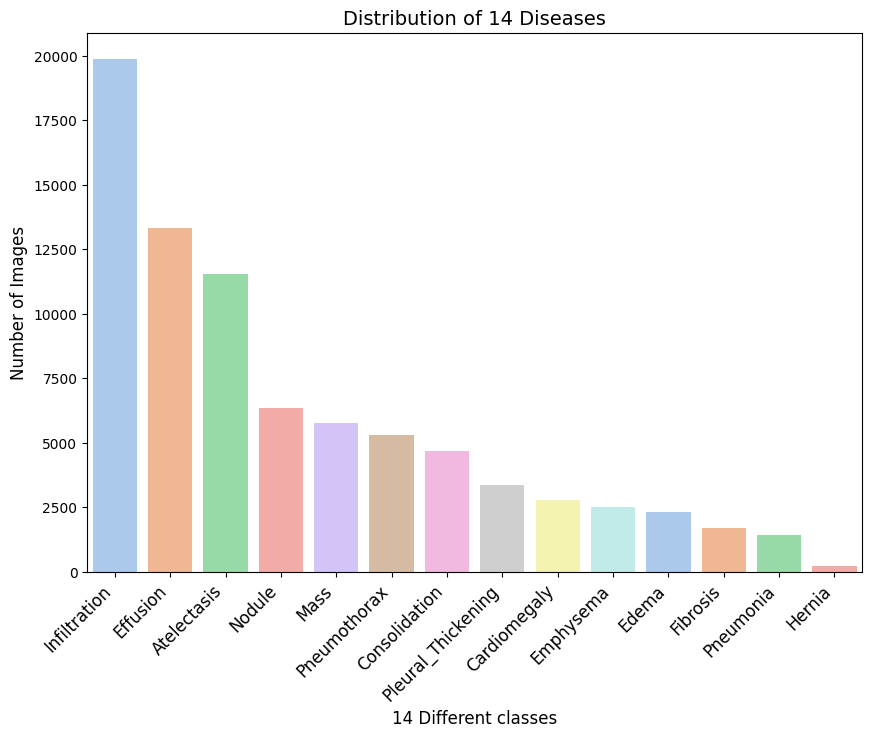

In [ ]:
# Plot for all the 14 disease in the dataset
all_classes = df[disease_columns].sum().sort_values(ascending=False)
colors = sns.color_palette('pastel')[:len(all_classes)]

plt.figure(figsize=(10, 7))
sns.barplot(x=all_classes.index, y=all_classes, palette=colors)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("14 Different classes", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Distribution of 14 Diseases", fontsize=14)
plt.show()

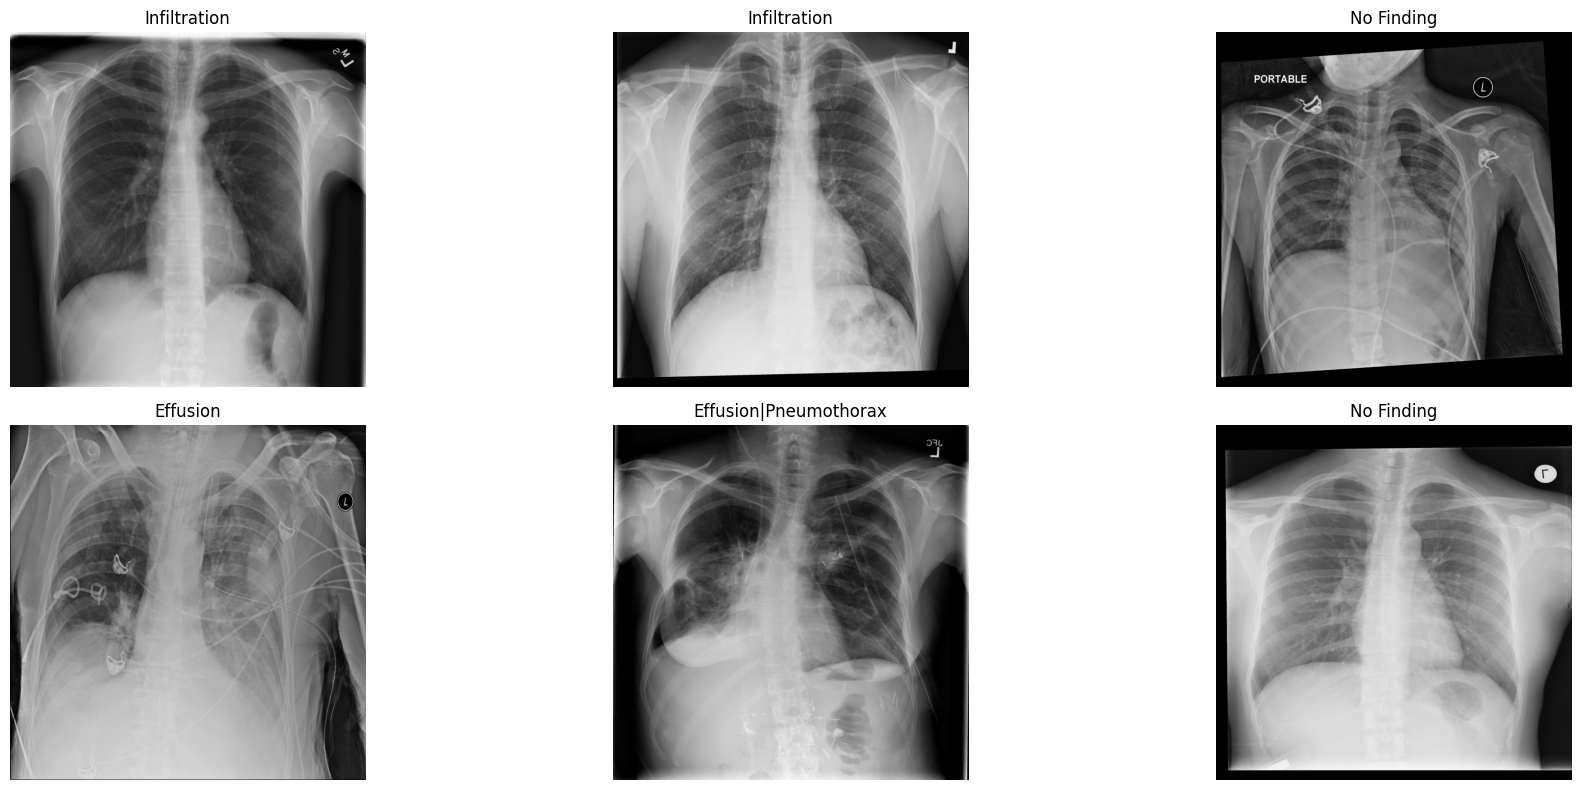

In [ ]:
import cv2
idx = np.random.randint(0,len(df),6)
f,ax = plt.subplots(2,3,figsize=(20,8))
ax = ax.flatten()
for i,j in enumerate(idx):
    ax[i].imshow(cv2.imread(df.loc[j]['full_path']))
    ax[i].set_title(df.loc[j]['Finding Labels'])
    ax[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Also there are multiple entries for a single patient so making sure that they a single does not go in other splits
randomGen = np.random.RandomState(42)
ids = set(df['Patient ID'].unique().flatten())
train_ids = set(randomGen.choice(df['Patient ID'].unique(), int(len(df['Patient ID'].unique()) * 0.7), replace=False).flatten())
valid_ids = ids - train_ids
print(len(ids), len(train_ids), len(valid_ids), int(len(valid_ids)*0.4))

30802 21561 9241 3696


In [ ]:
test_ids = set(randomGen.choice(list(valid_ids), int(len(valid_ids)*0.4), replace=False))
valid_ids = valid_ids - test_ids
print(len(valid_ids), len(test_ids))

5545 3696


In [ ]:
train = df[df["Patient ID"].isin(train_ids)]
valid = df[df["Patient ID"].isin(valid_ids)]
test = df[df["Patient ID"].isin(test_ids)]

In [ ]:
train.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,full_path,Atelectasis,Consolidation,Infiltration,...,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,00000001_000.png,Cardiomegaly,0,1,58,M,../input/data/images_001/images/00000001_000.png,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,../input/data/images_001/images/00000001_001.png,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,../input/data/images_001/images/00000001_002.png,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,../input/data/images_001/images/00000003_000.png,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,00000003_001.png,Hernia,1,3,74,F,../input/data/images_001/images/00000003_001.png,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Reset index
train.reset_index(inplace=True, drop=True)
valid.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [ ]:
train.drop(columns=['Finding Labels', 'Image Index', 'Follow-up #', "Patient Age", "Patient Gender"],inplace=True)
valid.drop(columns=['Finding Labels', 'Image Index', 'Follow-up #', "Patient Age", "Patient Gender"],inplace=True)
test.drop(columns=['Finding Labels', 'Image Index', 'Follow-up #', "Patient Age", "Patient Gender"],inplace=True)

In [ ]:
IMG_SIZE=(224, 224)
def img_dataset(inp_df, path_col, target_col, aug_args, shuffle = True):
    img_gen = ImageDataGenerator(rescale=1./255, **aug_args)
    data = img_gen.flow_from_dataframe(dataframe = inp_df,
                                     x_col = path_col,
                                     y_col = target_col,
                                     class_mode = "raw",
                                     batch_size = 32,
                                     seed = 42,
                                     shuffle = shuffle,
                                     target_size = IMG_SIZE)
    return data

In [ ]:
trainGen = img_dataset(train, 'full_path', train.columns[2:], dict(),shuffle=True)
validGen = img_dataset(valid, 'full_path', train.columns[2:], dict(),shuffle=False)

Found 78661 validated image filenames.
Found 19679 validated image filenames.


## Model Creation

In [ ]:
# Input layer
base_model = tf.keras.applications.DenseNet121(include_top=False, weights='imagenet')
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
output = tf.keras.layers.Dense(len(disease_columns), activation='sigmoid')(x)

model_1 = tf.keras.models.Model(inputs=base_model.input, outputs=output)
# model_1.summary()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Model callbacks

model_chkpt = tf.keras.callbacks.ModelCheckpoint(filepath='base_model_{epoch:02d}-{val_loss:.2f}.weights.h5',
                                                monitor='val_loss',
                                                save_best_only=True,
                                                save_weights_only=True,
                                                verbose=1)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

callbacks = [model_chkpt, early_stop]

In [ ]:
# Compile model
model_1.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=[tf.keras.metrics.binary_accuracy])

history = model_1.fit(trainGen,
                    steps_per_epoch=500,
                    validation_data=validGen,
                    validation_steps=int(len(validGen) * 0.1),
                    epochs=30,
                    callbacks=callbacks)

Epoch 1/30


W0000 00:00:1712985626.442958      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 824ms/step - binary_accuracy: 0.9486 - loss: 0.1748

W0000 00:00:1712986047.710887      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 0.34869, saving model to base_model_01-0.35.weights.h5
500/500 ━━━━━━━━━━━━━━━━━━━━ 570s 906ms/step - binary_accuracy: 0.9486 - loss: 0.1748 - val_binary_accuracy: 0.9552 - val_loss: 0.3487
Epoch 2/30
349/500 ━━━━━━━━━━━━━━━━━━━━ 2:33 1s/step - binary_accuracy: 0.9457 - loss: 0.1778   

W0000 00:00:1712986433.335946      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 927ms/step - binary_accuracy: 0.9462 - loss: 0.1766
Epoch 2: val_loss improved from 0.34869 to 0.16394, saving model to base_model_02-0.16.weights.h5
500/500 ━━━━━━━━━━━━━━━━━━━━ 498s 997ms/step - binary_accuracy: 0.9462 - loss: 0.1766 - val_binary_accuracy: 0.9546 - val_loss: 0.1639
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 739ms/step - binary_accuracy: 0.9489 - loss: 0.1670
Epoch 3: val_loss improved from 0.16394 to 0.15612, saving model to base_model_03-0.16.weights.h5
500/500 ━━━━━━━━━━━━━━━━━━━━ 419s 839ms/step - binary_accuracy: 0.9489 - loss: 0.1670 - val_binary_accuracy: 0.9561 - val_loss: 0.1561
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 717ms/step - binary_accuracy: 0.9473 - loss: 0.1687
Epoch 4: val_loss did not improve from 0.15612
500/500 ━━━━━━━━━━━━━━━━━━━━ 403s 806ms/step - binary_accuracy: 0.9473 - loss: 0.1687 - val_binary_accuracy: 0.9552 - val_loss: 0.1689
Epoch 5/30
459/500 ━━━━━━━━━━━━━━━━━━━━ 27s 667ms/step - binary_accuracy: 0.94

In [ ]:
base_model = tf.keras.applications.DenseNet121(include_top=False, weights="imagenet")
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
output = tf.keras.layers.Dense(len(disease_columns), activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
model.load_weights('/kaggle/working/base_model_03-0.16.weights.h5')
li = randomGen.choice(range(len(test)),1000,replace=False)
test.reset_index(inplace=True,drop=True)

def ret_test_imgs(path_indices):
    imgs=[]
    for p in path_indices:
        arr=cv2.imread(test.loc[p]['full_path'])/255
        arr=cv2.resize(arr, dsize=(256,256))
        imgs.append(arr)
    return np.array(imgs)

y_preds=model.predict(ret_test_imgs(li))
y_vals=test[test.index.isin(li)].drop(columns=['Patient ID','full_path']).values

 2/32 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step  

W0000 00:00:1712988918.730126      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 46s 664ms/step


W0000 00:00:1712988939.322813      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


NameError: name 'roc_curve' is not defined

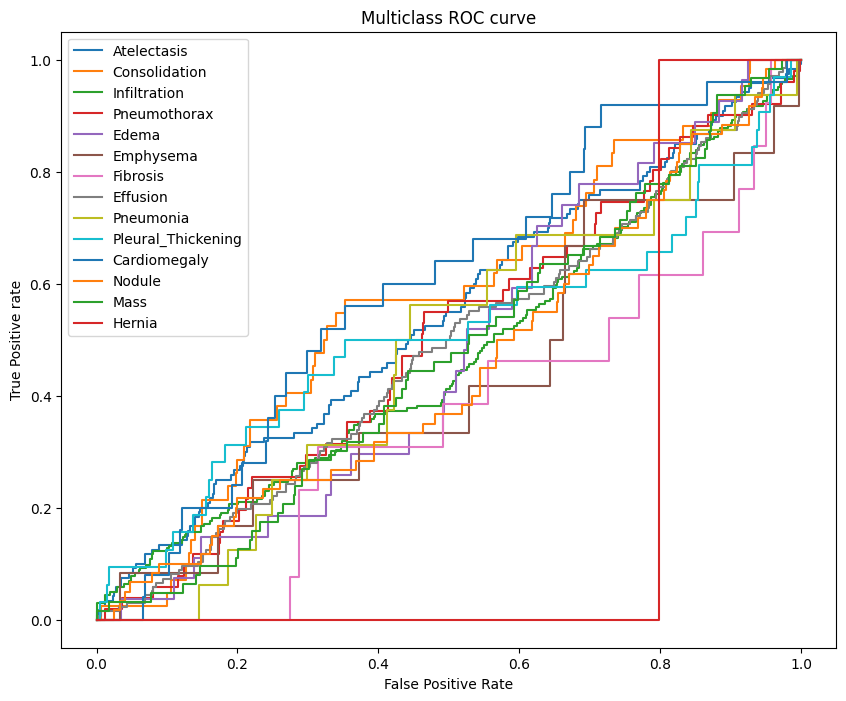

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr = {}
tpr = {}
thresh ={}
for i in range(len(test.columns[2:])):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_vals[:,i], y_preds[:,i])
plt.subplots(figsize=(10,8))
for i,c in enumerate(test.columns[2:]):
    plt.plot(fpr[i], tpr[i], label=f'{c}')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [ ]:
def ret_tresh(tresh):
    arr=y_preds.copy()
    arr[arr>tresh]=1
    arr[arr<=tresh]=0
    return arr

In [ ]:
arr=ret_tresh(0.6)
for i,c in enumerate(test.columns[2:]):
    act=np.sum(y_vals[:,i])
    pr=np.sum(arr[:,i])
    print(f'For {c} actual cases={act},predicted cases={pr},roc-auc-score{roc_auc_score(y_vals[:,i],y_preds[:,i])}\n')

For Atelectasis actual cases=120.0,predicted cases=0.0,roc-auc-score0.5406344696969697

For Consolidation actual cases=42.0,predicted cases=0.0,roc-auc-score0.5648175762998311

For Infiltration actual cases=204.0,predicted cases=0.0,roc-auc-score0.47217090353729435

For Pneumothorax actual cases=51.0,predicted cases=0.0,roc-auc-score0.49730366329882847

For Edema actual cases=27.0,predicted cases=0.0,roc-auc-score0.4751246621750219

For Emphysema actual cases=12.0,predicted cases=0.0,roc-auc-score0.42872807017543857

For Fibrosis actual cases=13.0,predicted cases=0.0,roc-auc-score0.3598316577039981

For Effusion actual cases=136.0,predicted cases=3.0,roc-auc-score0.47974537037037035

For Pneumonia actual cases=16.0,predicted cases=0.0,roc-auc-score0.47878556910569103

For Pleural_Thickening actual cases=32.0,predicted cases=0.0,roc-auc-score0.5037125516528925

For Cardiomegaly actual cases=25.0,predicted cases=0.0,roc-auc-score0.5939282051282051

For Nodule actual cases=60.0,predicted 

### Model 2

In [ ]:
# Input layer
base_model = tf.keras.applications.DenseNet121(include_top=False, weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
output = tf.keras.layers.Dense(len(disease_columns), activation='sigmoid')(x)

model_2 = tf.keras.models.Model(inputs=base_model.input, outputs=output)
# model_1.summary()

# Model callbacks

model_chkpt = tf.keras.callbacks.ModelCheckpoint(filepath='base_model_fulldataset_{epoch:02d}-{val_loss:.2f}.weights.h5',
                                                monitor='val_loss',
                                                save_best_only=True,
                                                save_weights_only=True,
                                                verbose=1)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

callbacks = [model_chkpt, early_stop]

# Compile model
model_2.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=[tf.keras.metrics.binary_accuracy])

history = model_1.fit(trainGen,
                    validation_data=validGen,
                    validation_steps=int(len(validGen) * 0.7),
                    epochs=15,
                    callbacks=callbacks)

In [ ]:
base_model = tf.keras.applications.DenseNet121(include_top=False, weights="imagenet")
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
output = tf.keras.layers.Dense(len(disease_columns), activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
model.load_weights('/kaggle/working/base_model_fulldataset_01-0.15.weights.h5')
li = randomGen.choice(range(len(test)),1000,replace=False)
test.reset_index(inplace=True,drop=True)

def ret_test_imgs(path_indices):
    imgs=[]
    for p in path_indices:
        arr=cv2.imread(test.loc[p]['full_path'])/255
        arr=cv2.resize(arr, dsize=(256,256))
        imgs.append(arr)
    return np.array(imgs)

y_preds=model.predict(ret_test_imgs(li))
y_vals=test[test.index.isin(li)].drop(columns=['Patient ID','full_path']).values

 3/32 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step

W0000 00:00:1713006562.969563      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 341ms/step


W0000 00:00:1713006573.539291      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr = {}
tpr = {}
thresh ={}
for i in range(len(test.columns[2:])):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_vals[:,i], y_preds[:,i])
plt.subplots(figsize=(10,8))
for i,c in enumerate(test.columns[2:]):
    plt.plot(fpr[i], tpr[i], label=f'{c}')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

NameError: name 'test' is not defined

In [ ]:
arr=ret_tresh(0.6)
for i,c in enumerate(test.columns[2:]):
    act=np.sum(y_vals[:,i])
    pr=np.sum(arr[:,i])
    print(f'For {c} actual cases={act},predicted cases={pr},roc-auc-score{roc_auc_score(y_vals[:,i],y_preds[:,i])}\n')

For Atelectasis actual cases=117.0,predicted cases=0.0,roc-auc-score0.4759028564238077

For Consolidation actual cases=47.0,predicted cases=0.0,roc-auc-score0.5746690183295752

For Infiltration actual cases=182.0,predicted cases=0.0,roc-auc-score0.48154168569816497

For Pneumothorax actual cases=48.0,predicted cases=1.0,roc-auc-score0.47321428571428575

For Edema actual cases=22.0,predicted cases=0.0,roc-auc-score0.4292619445993679

For Emphysema actual cases=13.0,predicted cases=0.0,roc-auc-score0.6313615462551634

For Fibrosis actual cases=23.0,predicted cases=0.0,roc-auc-score0.5734502247341018

For Effusion actual cases=144.0,predicted cases=44.0,roc-auc-score0.5043889537902388

For Pneumonia actual cases=7.0,predicted cases=0.0,roc-auc-score0.5688390159689253

For Pleural_Thickening actual cases=37.0,predicted cases=0.0,roc-auc-score0.48014369509696614

For Cardiomegaly actual cases=30.0,predicted cases=2.0,roc-auc-score0.508384879725086

For Nodule actual cases=45.0,predicted cas

## Resampling the dataset

In [ ]:
df['Finding Labels'] = df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))

In [ ]:
MIN_CASES = 1000
disease_columns = [c_label for c_label in disease_columns if df[c_label].sum()>MIN_CASES]
print('Clean Labels ({})'.format(len(disease_columns)),
      [(c_label,int(df[c_label].sum())) for c_label in disease_columns])

Clean Labels (13) [('Atelectasis', 11558), ('Consolidation', 4667), ('Infiltration', 19891), ('Pneumothorax', 5301), ('Edema', 2302), ('Emphysema', 2516), ('Fibrosis', 1686), ('Effusion', 13316), ('Pneumonia', 1430), ('Pleural_Thickening', 3384), ('Cardiomegaly', 2776), ('Nodule', 6331), ('Mass', 5779)]


In [ ]:
df.drop(columns='Hernia', inplace=True)
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,full_path,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass
0,00000001_000.png,Cardiomegaly,0,1,58,M,../input/data/images_001/images/00000001_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,../input/data/images_001/images/00000001_001.png,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,../input/data/images_001/images/00000001_002.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,00000002_000.png,,0,2,81,M,../input/data/images_001/images/00000002_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,../input/data/images_001/images/00000003_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sample_weights = df['Finding Labels'].map(lambda x: len(x.split('|')) if len(x)>0 else 0).values + 4e-2
sample_weights /= sample_weights.sum()
df = df.sample(40000, weights=sample_weights)

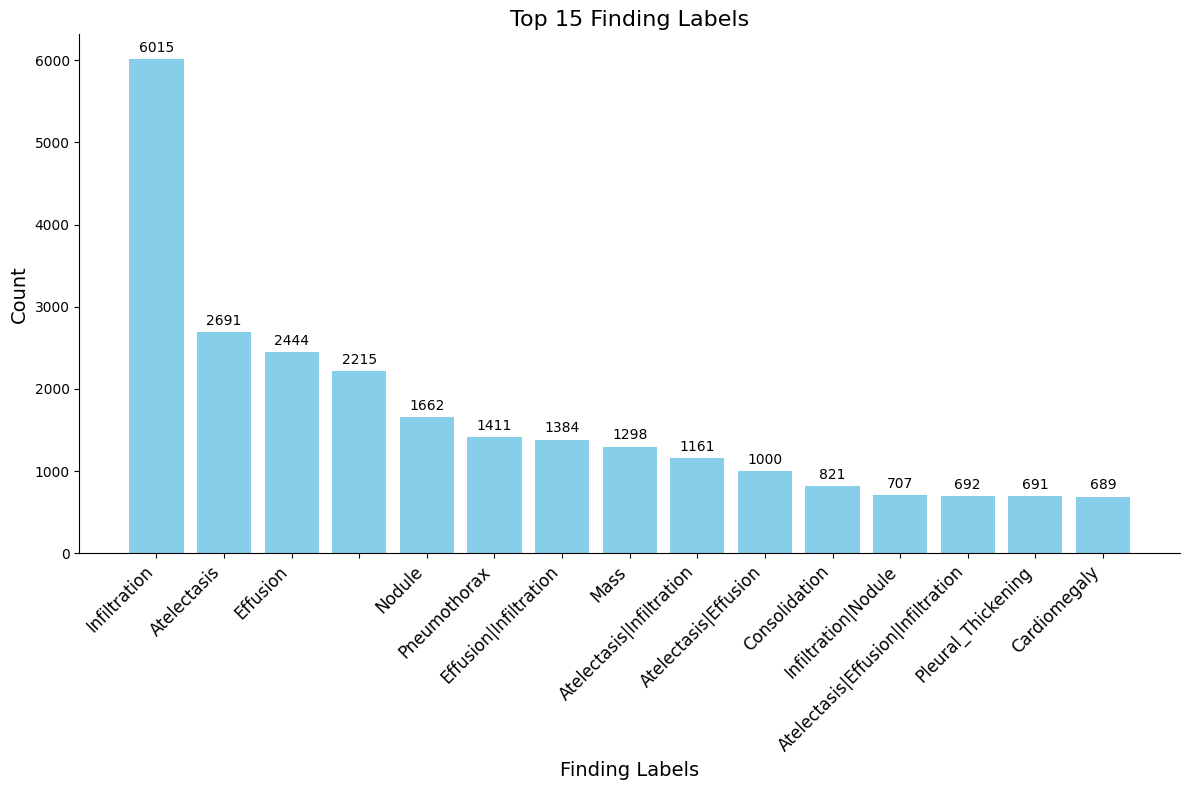

In [ ]:
label_counts = df['Finding Labels'].value_counts()[:15]

fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

bars = ax1.bar(np.arange(len(label_counts)) + 0.5, label_counts, color='skyblue')
ax1.set_xticks(np.arange(len(label_counts)) + 0.5)
ax1.set_xticklabels(label_counts.index, rotation=45, ha='right', fontsize=12)

ax1.set_xlabel('Finding Labels', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.set_title('Top 15 Finding Labels', fontsize=16)

for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 50, f'{yval}', ha='center', va='bottom', fontsize=10)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Also there are multiple entries for a single patient so making sure that they a single does not go in other splits
randomGen = np.random.RandomState(42)
ids = set(df['Patient ID'].unique().flatten())
train_ids = set(randomGen.choice(df['Patient ID'].unique(), int(len(df['Patient ID'].unique()) * 0.7), replace=False).flatten())
valid_ids = ids - train_ids
print(len(ids), len(train_ids), len(valid_ids), int(len(valid_ids)*0.4))

12636 8845 3791 1516


In [ ]:
test_ids = set(randomGen.choice(list(valid_ids), int(len(valid_ids)*0.4), replace=False))
valid_ids = valid_ids - test_ids
print(len(valid_ids), len(test_ids))

train = df[df["Patient ID"].isin(train_ids)]
valid = df[df["Patient ID"].isin(valid_ids)]
test = df[df["Patient ID"].isin(test_ids)]

# Reset index
train.reset_index(inplace=True, drop=True)
valid.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

train.drop(columns=['Finding Labels', 'Image Index', 'Follow-up #', "Patient Age", "Patient Gender"],inplace=True)
valid.drop(columns=['Finding Labels', 'Image Index', 'Follow-up #', "Patient Age", "Patient Gender"],inplace=True)
test.drop(columns=['Finding Labels', 'Image Index', 'Follow-up #', "Patient Age", "Patient Gender"],inplace=True)

2275 1516


In [ ]:
trainGen = img_dataset(train, 'full_path', train.columns[2:], dict(),shuffle=True)
validGen = img_dataset(valid, 'full_path', train.columns[2:], dict(),shuffle=False)

Found 28362 validated image filenames.
Found 6770 validated image filenames.


In [ ]:
base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False)
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(len(disease_columns), activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=output)

# Freeze layers in base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['binary_accuracy'])

In [ ]:
model.summary()

In [ ]:
# model_chkpt = tf.keras.callbacks.ModelCheckpoint(filepath='base_model_fulldataset_{epoch:02d}-{val_loss:.2f}.weights.h5',
#                                                 monitor='val_loss',
#                                                 save_best_only=True,
#                                                 save_weights_only=True,
#                                                 verbose=1)

# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# callbacks = [model_chkpt, early_stop]

history = model.fit(trainGen,
                    steps_per_epoch=100,
                    validation_data=validGen,
                    validation_steps=50,
                    epochs=5)

Epoch 1/5
  1/100 ━━━━━━━━━━━━━━━━━━━━ 1:14:06 45s/step - binary_accuracy: 0.4399 - loss: 1.1740

I0000 00:00:1713227951.253710      88 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713227951.324258      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 799ms/step - binary_accuracy: 0.8249 - loss: 0.4677

W0000 00:00:1713228042.299891      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


100/100 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - binary_accuracy: 0.8251 - loss: 0.4670 - val_binary_accuracy: 0.8574 - val_loss: 0.3679
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - binary_accuracy: 0.8685 - loss: 0.3525 - val_binary_accuracy: 0.8711 - val_loss: 0.3423
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - binary_accuracy: 0.8721 - loss: 0.3505 - val_binary_accuracy: 0.8799 - val_loss: 0.3226
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 98s 987ms/step - binary_accuracy: 0.8749 - loss: 0.3385 - val_binary_accuracy: 0.8943 - val_loss: 0.2989
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 70s 711ms/step - binary_accuracy: 0.8773 - loss: 0.3328 - val_binary_accuracy: 0.9053 - val_loss: 0.2774


W0000 00:00:1713228484.150961      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


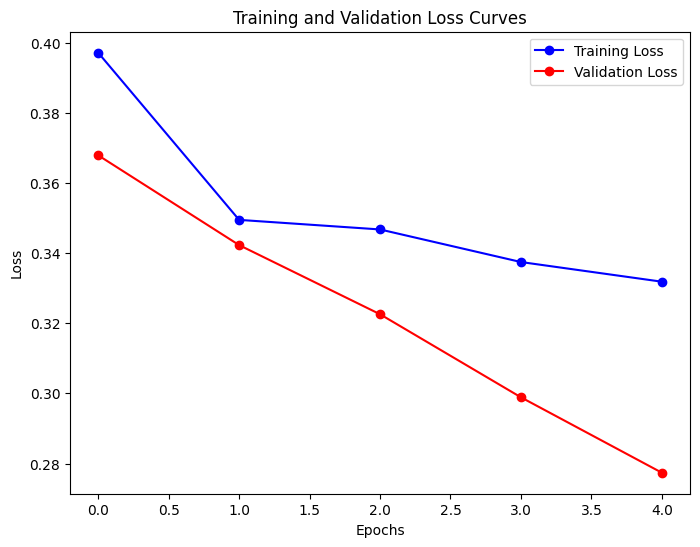

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], 'b-', marker='o', label='Training Loss')
plt.plot(history.history['val_loss'], 'r-', marker='o', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend(loc='upper right')
plt.show()

In [ ]:
model.save_weights('densenet121_20_epoch.weights.h5')

In [ ]:
model.load_weights("/kaggle/input/dense121-20-weights/densenet121_20_epoch.weights.h5")

In [ ]:
li = randomGen.choice(range(len(test)),1000,replace=False)
test.reset_index(inplace=True,drop=True)

def ret_test_imgs(path_indices):
    imgs=[]
    for p in path_indices:
        arr=cv2.imread(test.loc[p]['full_path'])/255
        arr=cv2.resize(arr, dsize=(224,224))
        imgs.append(arr)
    print(np.shape(imgs))
    return np.array(imgs)

images = ret_test_imgs(li)
# y_preds=model.predict(ret_test_imgs(li))
# y_vals=test[test.index.isin(li)].drop(columns=['Patient ID','full_path']).values

(1000, 224, 224, 3)


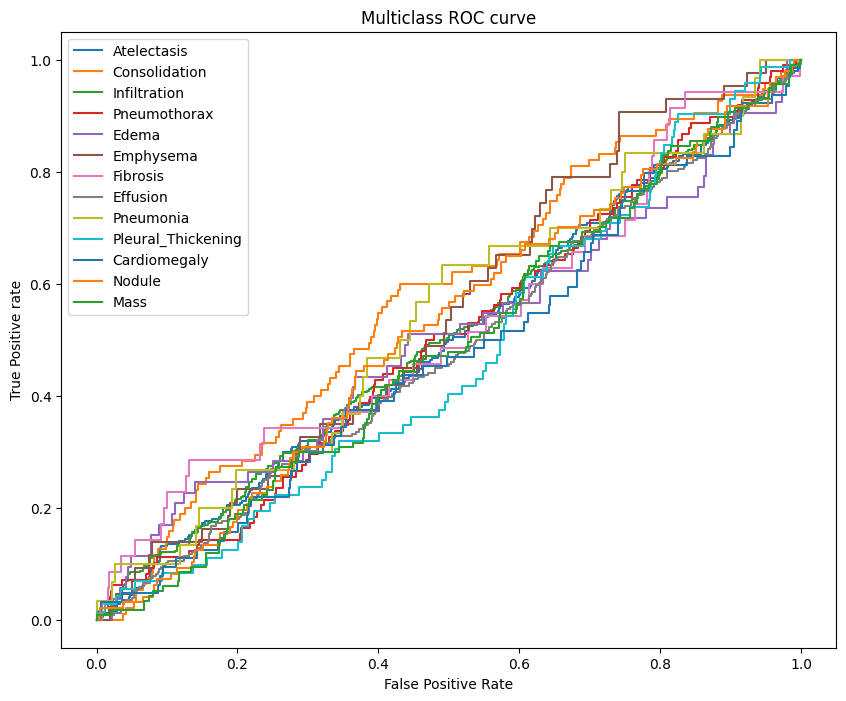

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr = {}
tpr = {}
thresh ={}
for i in range(len(test.columns[2:])):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_vals[:,i], y_preds[:,i])
plt.subplots(figsize=(10,8))
for i,c in enumerate(test.columns[2:]):
    plt.plot(fpr[i], tpr[i], label=f'{c}')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [ ]:
def ret_tresh(tresh):
    arr=y_preds.copy()
    arr[arr>tresh]=1
    arr[arr<=tresh]=0
    return arr

arr=ret_tresh(0.5)
for i,c in enumerate(test.columns[2:]):
    act=np.sum(y_vals[:,i])
    pr=np.sum(arr[:,i])
    print(f'For {c} actual cases={act},predicted cases={pr},roc-auc-score{roc_auc_score(y_vals[:,i],y_preds[:,i])}\n')

For Atelectasis actual cases=250.0,predicted cases=0.0,roc-auc-score0.5007253333333334

For Consolidation actual cases=95.0,predicted cases=0.0,roc-auc-score0.5726548415236987

For Infiltration actual cases=389.0,predicted cases=90.0,roc-auc-score0.5056273377117877

For Pneumothorax actual cases=98.0,predicted cases=0.0,roc-auc-score0.5004638218923934

For Edema actual cases=53.0,predicted cases=0.0,roc-auc-score0.5022414377079556

For Emphysema actual cases=43.0,predicted cases=0.0,roc-auc-score0.542295448470268

For Fibrosis actual cases=35.0,predicted cases=0.0,roc-auc-score0.5248556624722428

For Effusion actual cases=256.0,predicted cases=0.0,roc-auc-score0.4829574092741936

For Pneumonia actual cases=30.0,predicted cases=0.0,roc-auc-score0.5350515463917527

For Pleural_Thickening actual cases=72.0,predicted cases=0.0,roc-auc-score0.46913912835249044

For Cardiomegaly actual cases=64.0,predicted cases=0.0,roc-auc-score0.4721554487179487

For Nodule actual cases=97.0,predicted case

In [ ]:
import math

def plot_images_with_predictions(images, actual_values, predicted_values, class_names=None, images_per_row=5):
    num_images = len(images)
    num_rows = math.ceil(num_images / images_per_row)
    plt.figure(figsize=(5 * images_per_row, 5 * num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, images_per_row, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        actual_label = class_names[np.argmax(actual_values[i])] if class_names else np.argmax(actual_values[i])
        predicted_label = class_names[np.argmax(predicted_values[i])] if class_names else np.argmax(predicted_values[i])
        confidence = round(np.max(predicted_values[i]) * 100, 2)
        plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}\nConfidence: {confidence}%')
    plt.tight_layout()
    plt.show()

subset_indices = randomGen.choice(range(len(test)), 20, replace=False)
subset_images = ret_test_imgs(subset_indices)
subset_y_preds = model.predict(subset_images)
subset_y_vals = test[test.index.isin(subset_indices)].drop(columns=['Patient ID', 'full_path']).values

plot_images_with_predictions(images, y_vals, y_preds, class_names=disease_columns, images_per_row=5)

### Training Regularized model on fulldataset

In [ ]:
base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False)
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(len(disease_columns), activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=output)

# Freeze layers in base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['binary_accuracy'])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = model.fit(trainGen,
#                     steps_per_epoch=100,
                    validation_data=validGen,
#                     validation_steps=50,
                    epochs=10)

Epoch 1/10
  1/885 ━━━━━━━━━━━━━━━━━━━━ 11:14:54 46s/step - binary_accuracy: 0.4639 - loss: 1.2065

I0000 00:00:1713231173.099546      90 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713231173.172484      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


868/885 ━━━━━━━━━━━━━━━━━━━━ 16s 969ms/step - binary_accuracy: 0.8630 - loss: 0.3726

W0000 00:00:1713232012.901350      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


885/885 ━━━━━━━━━━━━━━━━━━━━ 0s 960ms/step - binary_accuracy: 0.8632 - loss: 0.3721

W0000 00:00:1713232034.283533      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


885/885 ━━━━━━━━━━━━━━━━━━━━ 1125s 1s/step - binary_accuracy: 0.8632 - loss: 0.3721 - val_binary_accuracy: 0.8776 - val_loss: 0.3238
Epoch 2/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 579s 650ms/step - binary_accuracy: 0.8763 - loss: 0.3318 - val_binary_accuracy: 0.8781 - val_loss: 0.3180
Epoch 3/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 576s 647ms/step - binary_accuracy: 0.8755 - loss: 0.3319 - val_binary_accuracy: 0.8781 - val_loss: 0.3195
Epoch 4/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 581s 652ms/step - binary_accuracy: 0.8760 - loss: 0.3279 - val_binary_accuracy: 0.8780 - val_loss: 0.3175
Epoch 5/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 577s 648ms/step - binary_accuracy: 0.8764 - loss: 0.3262 - val_binary_accuracy: 0.8778 - val_loss: 0.3149
Epoch 6/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 578s 649ms/step - binary_accuracy: 0.8762 - loss: 0.3258 - val_binary_accuracy: 0.8776 - val_loss: 0.3160
Epoch 7/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 579s 650ms/step - binary_accuracy: 0.8760 - loss: 0.3256 - val_binary_accuracy: 0.8785 - val_loss

In [ ]:
model.save_weights("densenet121_reg_10.weights.h5")

In [ ]:
li = randomGen.choice(range(len(test)),1000,replace=False)
test.reset_index(inplace=True,drop=True)

def ret_test_imgs(path_indices):
    imgs=[]
    for p in path_indices:
        arr=cv2.imread(test.loc[p]['full_path'])/255
        arr=cv2.resize(arr, dsize=(224,224))
        imgs.append(arr)
    print(np.shape(imgs))
    return np.array(imgs)

images = ret_test_imgs(li)
y_preds=model.predict(images)
y_vals=test[test.index.isin(li)].drop(columns=['Patient ID','full_path']).values

(1000, 224, 224, 3)
 3/32 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step

W0000 00:00:1713237589.029312      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 640ms/step


W0000 00:00:1713237608.860919      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


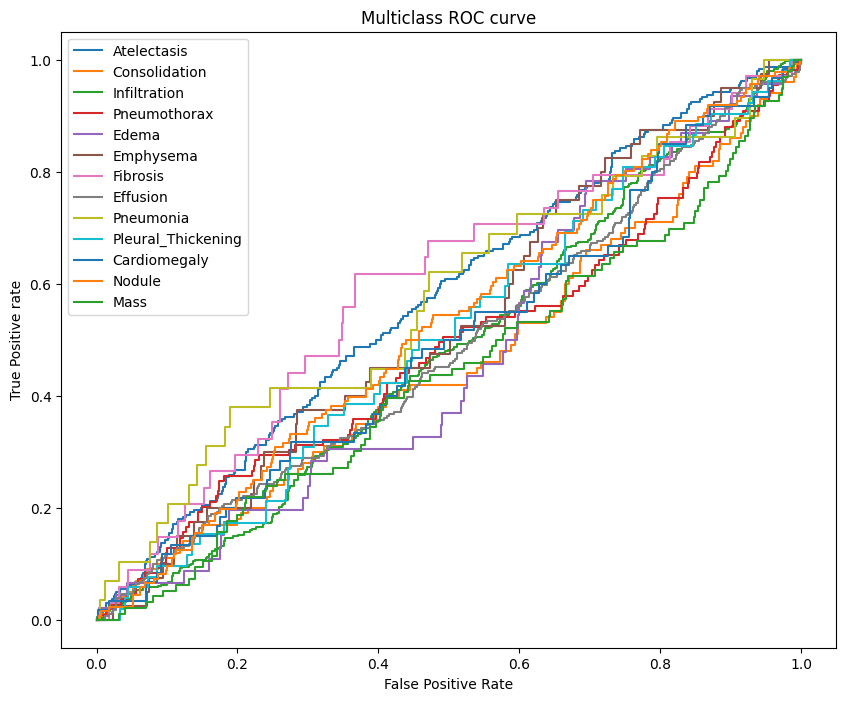

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr = {}
tpr = {}
thresh ={}
for i in range(len(test.columns[2:])):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_vals[:,i], y_preds[:,i])
plt.subplots(figsize=(10,8))
for i,c in enumerate(test.columns[2:]):
    plt.plot(fpr[i], tpr[i], label=f'{c}')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [ ]:
def ret_tresh(tresh):
    arr=y_preds.copy()
    arr[arr>tresh]=1
    arr[arr<=tresh]=0
    return arr

arr=ret_tresh(0.5)
for i,c in enumerate(test.columns[2:]):
    act=np.sum(y_vals[:,i])
    pr=np.sum(arr[:,i])
    print(f'For {c} actual cases={act},predicted cases={pr},roc-auc-score{roc_auc_score(y_vals[:,i],y_preds[:,i])}\n')

For Atelectasis actual cases=240.0,predicted cases=0.0,roc-auc-score0.572077850877193

For Consolidation actual cases=100.0,predicted cases=0.0,roc-auc-score0.45903333333333335

For Infiltration actual cases=382.0,predicted cases=13.0,roc-auc-score0.48147206831698264

For Pneumothorax actual cases=109.0,predicted cases=0.0,roc-auc-score0.4825111461197088

For Edema actual cases=46.0,predicted cases=0.0,roc-auc-score0.47021693555737853

For Emphysema actual cases=40.0,predicted cases=0.0,roc-auc-score0.5296354166666666

For Fibrosis actual cases=34.0,predicted cases=0.0,roc-auc-score0.5896054073803435

For Effusion actual cases=281.0,predicted cases=6.0,roc-auc-score0.4863219477427625

For Pneumonia actual cases=29.0,predicted cases=0.0,roc-auc-score0.5712205689122483

For Pleural_Thickening actual cases=52.0,predicted cases=0.0,roc-auc-score0.5060654008438819

For Cardiomegaly actual cases=60.0,predicted cases=0.0,roc-auc-score0.49255319148936166

For Nodule actual cases=136.0,predicte

In [ ]:
## Train the same model for another 10 epoch

model.load_weights("/kaggle/input/nih_densenet_model/tensorflow2/densenet_reg_10/1/densenet121_reg_10.weights.h5")

In [ ]:
history = model.fit(trainGen,
                  validation_data=validGen,
                  epochs=10)

Epoch 1/10
  1/887 ━━━━━━━━━━━━━━━━━━━━ 11:25:43 46s/step - binary_accuracy: 0.8870 - loss: 0.3028

I0000 00:00:1713244255.080267      90 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713244255.149350      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


783/887 ━━━━━━━━━━━━━━━━━━━━ 1:46 1s/step - binary_accuracy: 0.8768 - loss: 0.3225

W0000 00:00:1713245052.469620      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


887/887 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - binary_accuracy: 0.8768 - loss: 0.3227

W0000 00:00:1713245168.331934      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


887/887 ━━━━━━━━━━━━━━━━━━━━ 1190s 1s/step - binary_accuracy: 0.8767 - loss: 0.3227 - val_binary_accuracy: 0.8793 - val_loss: 0.3127
Epoch 2/10


W0000 00:00:1713245398.796617      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


887/887 ━━━━━━━━━━━━━━━━━━━━ 596s 668ms/step - binary_accuracy: 0.8765 - loss: 0.3226 - val_binary_accuracy: 0.8792 - val_loss: 0.3157
Epoch 3/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 591s 662ms/step - binary_accuracy: 0.8764 - loss: 0.3220 - val_binary_accuracy: 0.8788 - val_loss: 0.3150
Epoch 4/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 589s 659ms/step - binary_accuracy: 0.8763 - loss: 0.3217 - val_binary_accuracy: 0.8791 - val_loss: 0.3123
Epoch 5/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 603s 676ms/step - binary_accuracy: 0.8757 - loss: 0.3224 - val_binary_accuracy: 0.8782 - val_loss: 0.3147
Epoch 6/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 604s 677ms/step - binary_accuracy: 0.8757 - loss: 0.3220 - val_binary_accuracy: 0.8789 - val_loss: 0.3157
Epoch 7/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 624s 679ms/step - binary_accuracy: 0.8761 - loss: 0.3222 - val_binary_accuracy: 0.8791 - val_loss: 0.3134
Epoch 8/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 604s 677ms/step - binary_accuracy: 0.8764 - loss: 0.3199 - val_binary_accuracy: 0.8782 - val_lo

In [ ]:
model.save_weights("densenet121_reg_20.weights.h5")

In [ ]:
li = randomGen.choice(range(len(test)),1000,replace=False)
test.reset_index(inplace=True,drop=True)

def ret_test_imgs(path_indices):
    imgs=[]
    for p in path_indices:
        arr=cv2.imread(test.loc[p]['full_path'])/255
        arr=cv2.resize(arr, dsize=(224,224))
        imgs.append(arr)
    print(np.shape(imgs))
    return np.array(imgs)

images = ret_test_imgs(li)
y_preds=model.predict(images)
y_vals=test[test.index.isin(li)].drop(columns=['Patient ID','full_path']).values

libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


(1000, 224, 224, 3)
 3/32 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step

W0000 00:00:1713251069.914339      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 625ms/step


W0000 00:00:1713251089.277390      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


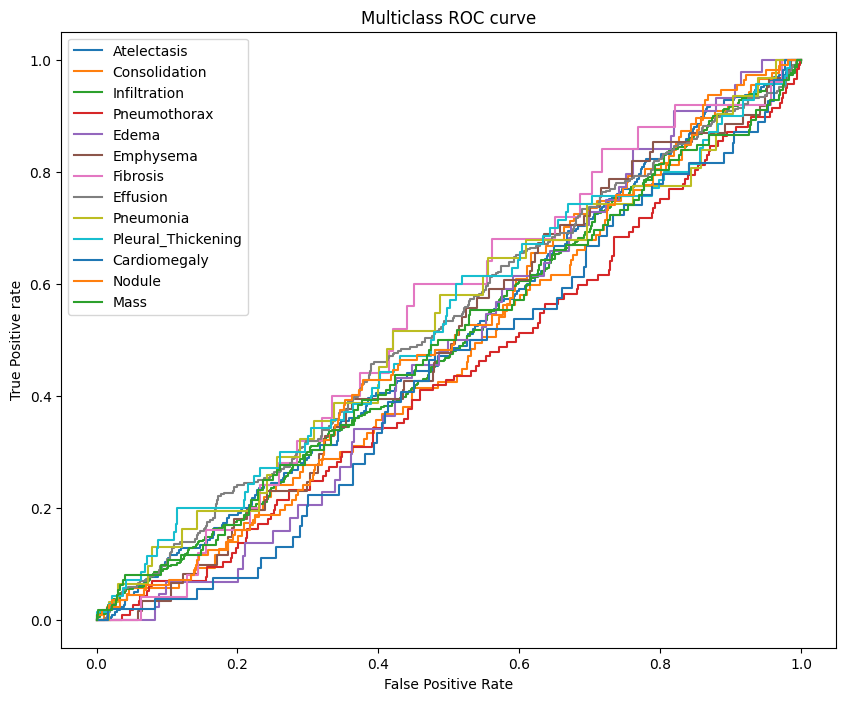

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr = {}
tpr = {}
thresh ={}
for i in range(len(test.columns[2:])):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_vals[:,i], y_preds[:,i])
plt.subplots(figsize=(10,8))
for i,c in enumerate(test.columns[2:]):
    plt.plot(fpr[i], tpr[i], label=f'{c}')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [ ]:
def ret_tresh(tresh):
    arr=y_preds.copy()
    arr[arr>tresh]=1
    arr[arr<=tresh]=0
    return arr

arr=ret_tresh(0.5)
for i,c in enumerate(test.columns[2:]):
    act=np.sum(y_vals[:,i])
    pr=np.sum(arr[:,i])
    print(f'For {c} actual cases={act},predicted cases={pr},roc-auc-score{roc_auc_score(y_vals[:,i],y_preds[:,i])}\n')

For Atelectasis actual cases=225.0,predicted cases=0.0,roc-auc-score0.5004673835125448

For Consolidation actual cases=87.0,predicted cases=0.0,roc-auc-score0.4834384560184311

For Infiltration actual cases=377.0,predicted cases=27.0,roc-auc-score0.4938881343375726

For Pneumothorax actual cases=117.0,predicted cases=0.0,roc-auc-score0.4385205834809459

For Edema actual cases=44.0,predicted cases=0.0,roc-auc-score0.4795311905667554

For Emphysema actual cases=61.0,predicted cases=0.0,roc-auc-score0.4933221599539098

For Fibrosis actual cases=25.0,predicted cases=0.0,roc-auc-score0.5346871794871795

For Effusion actual cases=304.0,predicted cases=2.0,roc-auc-score0.5223551875378101

For Pneumonia actual cases=31.0,predicted cases=0.0,roc-auc-score0.52049002962815

For Pleural_Thickening actual cases=70.0,predicted cases=0.0,roc-auc-score0.5234562211981567

For Cardiomegaly actual cases=54.0,predicted cases=0.0,roc-auc-score0.43943309059588126

For Nodule actual cases=112.0,predicted cas

In [ ]:
history = model.fit(trainGen,
                  validation_data=validGen,
                  epochs=10)

Epoch 1/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 595s 666ms/step - binary_accuracy: 0.8758 - loss: 0.3194 - val_binary_accuracy: 0.8787 - val_loss: 0.3128
Epoch 2/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 613s 687ms/step - binary_accuracy: 0.8766 - loss: 0.3198 - val_binary_accuracy: 0.8784 - val_loss: 0.3137
Epoch 3/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 588s 659ms/step - binary_accuracy: 0.8771 - loss: 0.3184 - val_binary_accuracy: 0.8787 - val_loss: 0.3162
Epoch 4/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 583s 654ms/step - binary_accuracy: 0.8759 - loss: 0.3193 - val_binary_accuracy: 0.8788 - val_loss: 0.3135
Epoch 5/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 661s 697ms/step - binary_accuracy: 0.8768 - loss: 0.3195 - val_binary_accuracy: 0.8788 - val_loss: 0.3155
Epoch 6/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 599s 671ms/step - binary_accuracy: 0.8767 - loss: 0.3187 - val_binary_accuracy: 0.8786 - val_loss: 0.3153
Epoch 7/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 603s 675ms/step - binary_accuracy: 0.8763 - loss: 0.3186 - val_binary_accuracy: 0.87

In [ ]:
model.save_weights('densenet121_reg_30.weights.h5')

In [ ]:
li = randomGen.choice(range(len(test)),1000,replace=False)
test.reset_index(inplace=True,drop=True)

def ret_test_imgs(path_indices):
    imgs=[]
    for p in path_indices:
        arr=cv2.imread(test.loc[p]['full_path'])/255
        arr=cv2.resize(arr, dsize=(224,224))
        imgs.append(arr)
    print(np.shape(imgs))
    return np.array(imgs)

images = ret_test_imgs(li)
y_preds=model.predict(images)
y_vals=test[test.index.isin(li)].drop(columns=['Patient ID','full_path']).values

(1000, 224, 224, 3)
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step


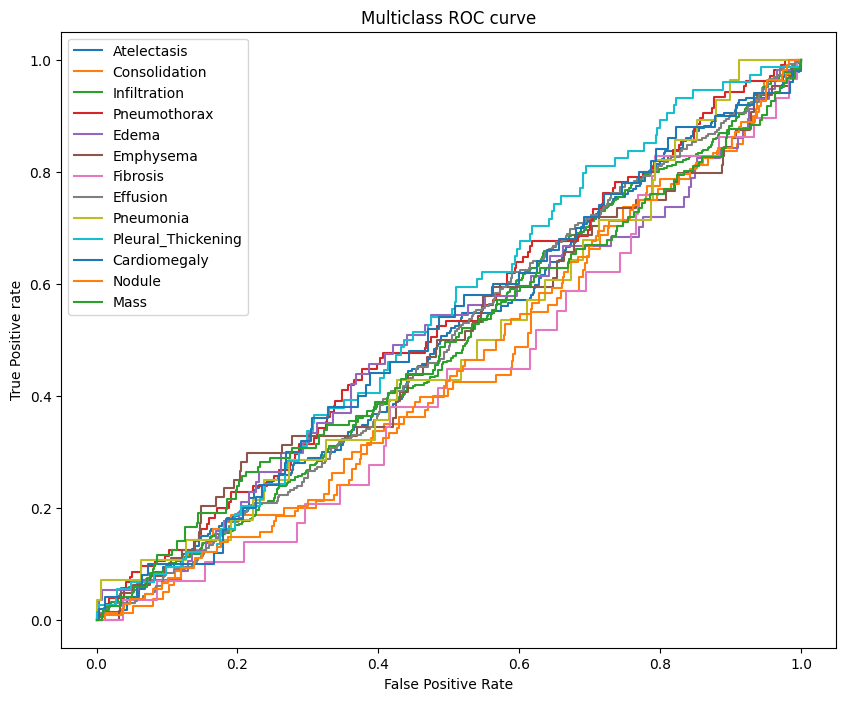

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr = {}
tpr = {}
thresh ={}
for i in range(len(test.columns[2:])):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_vals[:,i], y_preds[:,i])
plt.subplots(figsize=(10,8))
for i,c in enumerate(test.columns[2:]):
    plt.plot(fpr[i], tpr[i], label=f'{c}')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [ ]:
def ret_tresh(tresh):
    arr=y_preds.copy()
    arr[arr>tresh]=1
    arr[arr<=tresh]=0
    return arr

arr=ret_tresh(0.5)
for i,c in enumerate(test.columns[2:]):
    act=np.sum(y_vals[:,i])
    pr=np.sum(arr[:,i])
    print(f'For {c} actual cases={act},predicted cases={pr},roc-auc-score{roc_auc_score(y_vals[:,i],y_preds[:,i])}\n')

For Atelectasis actual cases=221.0,predicted cases=1.0,roc-auc-score0.49400263709710207

For Consolidation actual cases=80.0,predicted cases=0.0,roc-auc-score0.4438179347826087

For Infiltration actual cases=374.0,predicted cases=54.0,roc-auc-score0.4878782183800038

For Pneumothorax actual cases=105.0,predicted cases=0.0,roc-auc-score0.5233413141793031

For Edema actual cases=57.0,predicted cases=0.0,roc-auc-score0.4949117225726033

For Emphysema actual cases=64.0,predicted cases=0.0,roc-auc-score0.4908186431623932

For Fibrosis actual cases=29.0,predicted cases=0.0,roc-auc-score0.4259384211087041

For Effusion actual cases=264.0,predicted cases=23.0,roc-auc-score0.49149785902503296

For Pneumonia actual cases=28.0,predicted cases=0.0,roc-auc-score0.4866990005878895

For Pleural_Thickening actual cases=74.0,predicted cases=0.0,roc-auc-score0.5387017687233671

For Cardiomegaly actual cases=50.0,predicted cases=0.0,roc-auc-score0.5122526315789474

For Nodule actual cases=108.0,predicted

In [ ]:
IMG_SIZE=(224, 224)
def img_dataset(inp_df, path_col, target_col, aug_args, batch_size, shuffle = True):
    img_gen = ImageDataGenerator(rescale=1./255, **aug_args)
    data = img_gen.flow_from_dataframe(dataframe = inp_df,
                                     x_col = path_col,
                                     y_col = target_col,
                                     class_mode = "raw",
                                     batch_size = batch_size,
                                     seed = 42,
                                     shuffle = shuffle,
                                     target_size = IMG_SIZE)
    return data

In [ ]:
def flow_from_dataframe(in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    img_gen = ImageDataGenerator(rescale=1./255)
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_gen.flow_from_directory(base_dir,
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [ ]:
df['target_col'] = df.apply(lambda x: [x[disease_columns].values], 1).map(lambda x: x[0])

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df,
                                   test_size = 0.20,
                                   random_state = 42,
                                   stratify = df['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'test', test_df.shape[0])

train 32000 test 8000


In [ ]:
train_df, valid_df = train_test_split(train_df,
                                   test_size = 0.10,
                                   random_state = 42,
                                   stratify = train_df['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'valid', valid_df.shape[0])

train 28800 valid 3200


In [ ]:
train_gen = flow_from_dataframe(train_df,
                             path_col = 'full_path',
                            y_col = 'target_col',
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 16)

valid_gen = flow_from_dataframe(valid_df,
                             path_col = 'full_path',
                            y_col = 'target_col',
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 32) # we can use much larger batches for evaluation
# used a fixed dataset for evaluating the algorithm
test_X, test_Y = next(flow_from_dataframe(test_df,
                             path_col = 'full_path',
                            y_col = 'target_col',
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 8000))

In [ ]:
train_gen.filepaths.extend(train_gen.filenames)

In [ ]:
t_x, t_y = next(trainGen)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0])
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(disease_columns, c_y) if n_score>0.5]))
    c_ax.axis('off')

In [ ]:
img_in = tf.keras.layers.Input(t_x.shape[1:])
model = tf.keras.applications.DenseNet121(include_top= False ,
                weights='imagenet',
                input_tensor= img_in,
                input_shape= t_x.shape[1:],
                pooling ='avg')

x = model.output
predictions = tf.keras.layers.Dense(len(disease_columns), activation="sigmoid", name="predictions")(x)
model = tf.keras.models.Model(inputs=img_in, outputs=predictions)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=[tf.keras.metrics.binary_accuracy])

In [ ]:
history = model.fit(trainGen,
                  steps_per_epoch=100,
                  validation_data = validGen,
                  epochs = 20)

ValueError: Invalid dtype: object

In [ ]:
train_df['target_col'][0]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
      dtype=object)